In [839]:
# Nasser Althaiban   800764203   Homework1

# Problem 1 part a:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [840]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()
m = len(housing)
m
housing.shape

(545, 13)

In [841]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [842]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [843]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',]
# Defining the map function
def binary_map(x):
     return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [844]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100 )
df_train.shape


(381, 13)

In [845]:
df_test.shape

(164, 13)

In [846]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()


,area,bedrooms,bathrooms,stories,parking,price
359,3600,3,1,1,1,3710000
19,6420,3,2,2,1,8855000
159,3150,3,2,1,0,5460000
35,7000,3,2,4,2,8080940
28,7950,5,2,2,2,8400000


In [847]:
df_Newtrain.shape


(381, 6)

In [848]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain.values
y = y_Newtrain.values
m = len(X_Newtrain)
X_0 = np.ones((m, 1))             
X_0[:5]
X1    = df_Newtrain.values[:,0]
X2    = df_Newtrain.values[:,1]
X3    = df_Newtrain.values[:,2]
X4    = df_Newtrain.values[:,3]
X5    = df_Newtrain.values[:,4]

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)



In [849]:
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [850]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest.values
y_test = y_Newtest.values
m_test = len(X_Newtest)
X_0_test = np.ones((m_test, 1))             
X1_test    = df_Newtest.values[:,0]
X2_test    = df_Newtest.values[:,1]
X3_test    = df_Newtest.values[:,2]
X4_test    = df_Newtest.values[:,3]
X5_test    = df_Newtest.values[:,4]

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)


In [851]:
X_test= np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))


In [852]:
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J


In [853]:
cost = compute_cost(X, y_Newtrain, theta, m)
cost

12966317325103.15

In [854]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_train = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_train[i] = compute_cost(X, y, theta, m)             
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)      
    
    return theta, cost_train, cost_test

In [855]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha = 0.00000001;

In [856]:
cost = compute_cost(X, y, theta, m)
cost
theta, cost_train, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_train =', cost_train)
print('cost_test =', cost_test)

Final value of theta= [4.73492998e-01 8.65549229e+02 1.73247400e+00 9.20983665e-01
 1.40741877e+00 3.52681098e-01]
cost_train = [7.08737397e+12 4.24131744e+12 2.86351238e+12 2.19650287e+12
 1.87359673e+12 1.71727455e+12 1.64159737e+12 1.60496125e+12
 1.58722532e+12 1.57863915e+12 1.57448248e+12 1.57247017e+12
 1.57149598e+12 1.57102434e+12 1.57079600e+12 1.57068543e+12
 1.57063189e+12 1.57060595e+12 1.57059337e+12 1.57058727e+12
 1.57058429e+12 1.57058283e+12 1.57058210e+12 1.57058173e+12
 1.57058154e+12 1.57058142e+12 1.57058135e+12 1.57058129e+12
 1.57058124e+12 1.57058120e+12 1.57058116e+12 1.57058113e+12
 1.57058109e+12 1.57058105e+12 1.57058102e+12 1.57058098e+12
 1.57058094e+12 1.57058090e+12 1.57058087e+12 1.57058083e+12
 1.57058079e+12 1.57058076e+12 1.57058072e+12 1.57058068e+12
 1.57058065e+12 1.57058061e+12 1.57058057e+12 1.57058054e+12
 1.57058050e+12 1.57058046e+12 1.57058042e+12 1.57058039e+12
 1.57058035e+12 1.57058031e+12 1.57058028e+12 1.57058024e+12
 1.57058020e+12 1.

Text(0.5, 1.0, 'Convergence of gradient descent Problem1 a')

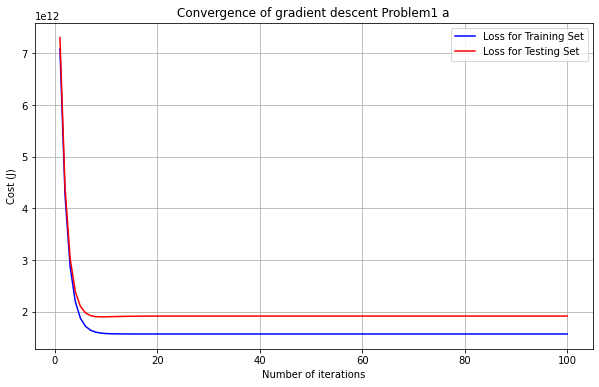

In [857]:
plt.plot(range(1, iterations + 1),cost_train, color='blue', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Testing Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Problem1 a')